## Utilizar este código para la fase 2

-5.999999999999999 4.0
-2.9999999999999996 6.999999999999999
-2.0 18.0
<class 'numpy.ndarray'>


array([[<Axes: title={'center': 'pr'}>, <Axes: title={'center': 'pa'}>],
       [<Axes: title={'center': 'pv'}>, <Axes: >]], dtype=object)

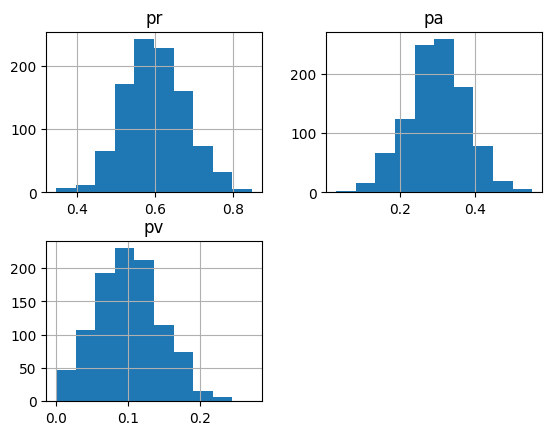

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
import matplotlib

# Función auxiliar para muestrear de una normal truncada en [0, 1]
def sample_truncnorm(mu, sigma, size):
    a, b = (0 - mu) / sigma, (1 - mu) / sigma
    print(a,b)
    return truncnorm.rvs(a, b, loc=mu, scale=sigma, size=size)

# Parámetros de las normales para rojo, azul, verde
mu_r, sigma_r = 0.6, 0.1
mu_a, sigma_a = 0.3, 0.1
mu_v, sigma_v = 0.1, 0.05

# Número de muestras
n = 1000

# Muestreo independiente de cada componente
x_r = sample_truncnorm(mu_r, sigma_r, n)
x_a = sample_truncnorm(mu_a, sigma_a, n)
x_v = sample_truncnorm(mu_v, sigma_v, n)

print(type(x_r))

# Normalización para que sumen 1
total = x_r + x_a + x_v
p_r = x_r / total
p_a = x_a / total
p_v = x_v / total

df = pd.DataFrame({"pr":p_r,"pa":p_a,"pv":p_v})
df.hist()

### En principio este no sirve para nada pero por si acaso


In [ ]:
import numpy as np
from scipy.stats import dirichlet
import pandas as pd
import matplotlib

alpha = np.array([1, 70, 9, 10])
A = dirichlet.rvs(alpha, size=1000)
df = pd.DataFrame({"p1":list(A[:,0]),"p2":list(A[:,1]),"p3":list(A[:,2]),"p4":list(A[:,3])})
df.hist()

In [3]:
df.describe().round(2)

,pr,pa,pv
count,1000.00,1000.00,1000.00
mean,0.60,0.30,0.10
std,0.08,0.08,0.05
min,0.37,0.03,0.00
25%,0.55,0.25,0.07
50%,0.60,0.31,0.10
75%,0.65,0.35,0.13
max,0.86,0.51,0.29


In [4]:
df.skew(), df.kurtosis()

(pr    0.169802
 pa   -0.282922
 pv    0.262538
 dtype: float64,
 pr    0.148338
 pa    0.138314
 pv   -0.053420
 dtype: float64)

## 🎯 ¿La normalización de normales truncadas da otra normal truncada?

### ❓ Pregunta:
Si tengo tres variables aleatorias \( x_r, x_a, x_v \) que siguen distribuciones normales truncadas entre 0 y 1, y luego defino:

$$
p_r = \frac{x_r}{x_r + x_a + x_v}, \quad
p_a = \frac{x_a}{x_r + x_a + x_v}, \quad
p_v = \frac{x_v}{x_r + x_a + x_v}
$$

¿Siguen \( p_r, p_a, p_v \) una distribución normal truncada?

---

### ❌ Respuesta: No

Al normalizar, estás aplicando una **transformación no lineal** a variables aleatorias independientes. Esto rompe tanto la independencia como la forma de las distribuciones marginales. El resultado **ya no es una normal truncada**.

---

### 🔄 ¿Qué ocurre entonces?

El vector \( (p_r, p_a, p_v) \) vive en el **simplex**:

$$
\Delta^2 = \left\{ (p_1, p_2, p_3) \in [0,1]^3 : p_1 + p_2 + p_3 = 1 \right\}
$$

Y su distribución:

- No tiene una forma cerrada conocida.
- No es Dirichlet (aunque se parece en espíritu).
- Es una distribución **inducida** por la normalización de normales truncadas independientes.

---

### 🧪 Comparación con el caso Dirichlet

Si en lugar de normales truncadas usáramos:

$$
x_i \sim \text{Gamma}(\alpha_i, 1)
$$

y luego:

$$
p_i = \frac{x_i}{\sum_j x_j}
$$

entonces sí se tendría:

$$
(p_1, p_2, p_3) \sim \text{Dirichlet}(\alpha_1, \alpha_2, \alpha_3)
$$

---

### ✅ Conclusión

| Etapa                     | Descripción |
|---------------------------|-------------|
| **Antes de normalizar**   | $( x_i \sim \text{Normal truncada}$, independientes |
| **Después de normalizar** | $( p_i = x_i / (x_r + x_a + x_v)$, dependientes |
| **Resultado**             | Distribución sobre el simplex, válida pero no estándar |
| **No son normales truncadas** | Aunque los $ x_i$ lo eran originalmente |

---

### 💡 Nota útil

Este método es muy válido para generar **vectores de pertenencia fuzzy plausibles** con incertidumbre, y es más flexible que la Dirichlet si quieres controlar las formas con medias y desviaciones.

